# Analyze the fully cleaned data by Llama 3 - 70B 

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# load the dataframe
df = pd.read_csv('./data/labelled_changemyview_final.csv')
df.head()

,post_id,OP_text,delta,comment_text,assertivity,full_text,num_tokens,relevance
0,pz0w6x,This is something I thought was standard all w...,False,The biggest problem with two spaces is that it...,4.303459,"PROMPT: \nWhen analyzing comments, determine t...",534,1.0
1,pz0w6x,This is something I thought was standard all w...,False,Do you think your post is difficult to disging...,4.838442,"PROMPT: \nWhen analyzing comments, determine t...",311,1.0
2,pz0w6x,This is something I thought was standard all w...,False,"That is a very good point, I have had troubles...",4.822953,"PROMPT: \nWhen analyzing comments, determine t...",344,1.0
3,pz0w6x,This is something I thought was standard all w...,False,I just realised that Reddit automatically made...,4.462715,"PROMPT: \nWhen analyzing comments, determine t...",341,1.0
4,pz0w6x,This is something I thought was standard all w...,False,What kind of argument could change what you pe...,4.165082,"PROMPT: \nWhen analyzing comments, determine t...",307,1.0


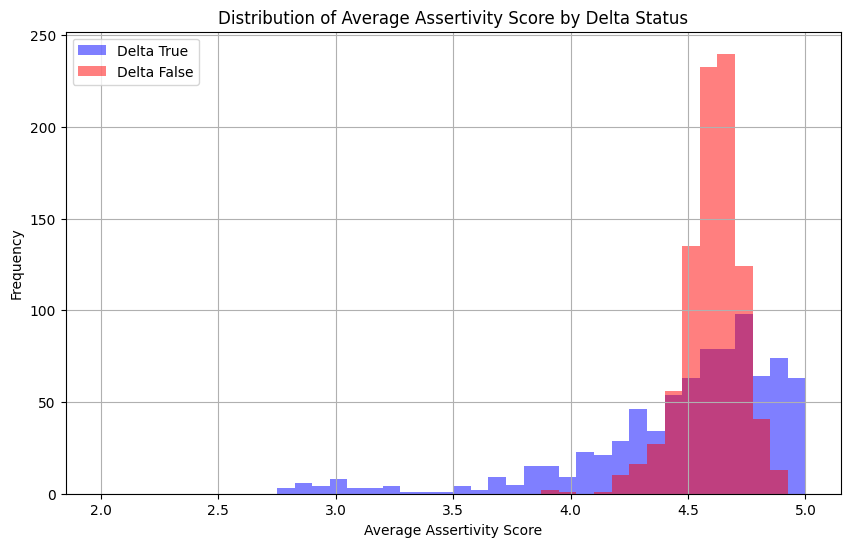

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# group the data by the post
grouped = df.groupby('post_id')

# Define the number of bins and the range for the histogram
num_bins = 40
score_range = (2, 5)  # Adjust this range according to your data

# Calculate bin edges
bin_edges = np.linspace(score_range[0], score_range[1], num_bins + 1)

# Initialize lists to store histogram data
hist_true = []
hist_false = []

for name, group in grouped:
    # Calculate average assertivity score for comments with delta True
    avg_true = group[group['delta']]['assertivity'].mean()
    # Calculate average assertivity score for comments with delta False
    avg_false = group[~group['delta']]['assertivity'].mean()
    
    # Append data points to histogram lists
    hist_true.append(avg_true)
    hist_false.append(avg_false)

# Plot the histograms
plt.figure(figsize=(10, 6))

# Histogram for delta True
plt.hist(hist_true, bins=bin_edges, alpha=0.5, color='blue', label='Delta True')

# Histogram for delta False
plt.hist(hist_false, bins=bin_edges, alpha=0.5, color='red', label='Delta False')

plt.xlabel('Average Assertivity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Assertivity Score by Delta Status')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# check if there are any posts with only delta false comments
grouped = df.groupby('post_id')
delta_false = []
for name, group in grouped:
    if group['delta'].all() == False:
        delta_false.append(name)

print(len(delta_false))

# do the same with posts with at least one delta true
delta_true = []
for name, group in grouped:
    if group['delta'].any() == True:
        delta_true.append(name)

print(len(delta_true))

# only get posts with at least one delta true
df = df[df['post_id'].isin(delta_true)]

1535
900


Weighted assertivity.

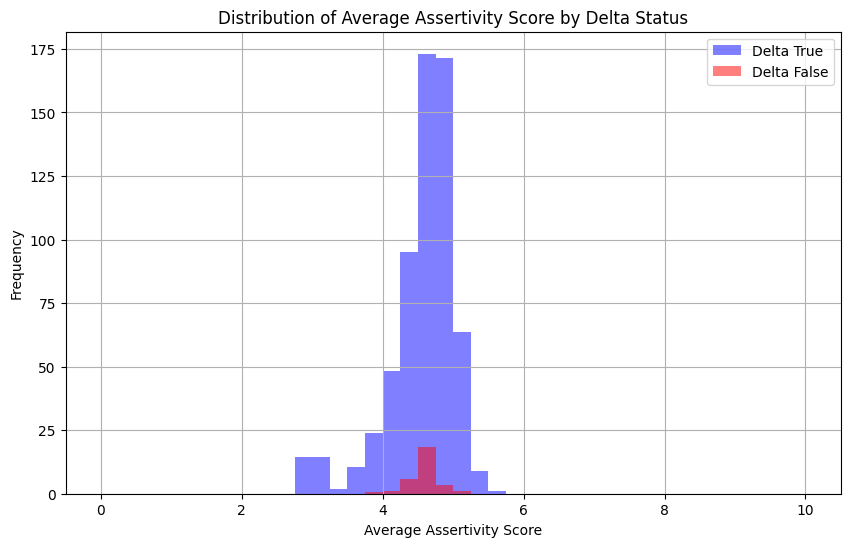

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# group the data by the post
grouped = df.groupby('post_id')

# Define the number of bins and the range for the histogram
num_bins = 40
score_range = (0, 10)  # Adjust this range according to your data

# Calculate bin edges
bin_edges = np.linspace(score_range[0], score_range[1], num_bins + 1)

# Initialize lists to store histogram data and weights
hist_true = []
hist_false = []
weights_true = []
weights_false = []

for name, group in grouped:
    # Calculate average assertivity score for comments with delta True
    avg_true = group[group['delta']]['assertivity'].mean()
    # Calculate average assertivity score for comments with delta False
    avg_false = group[~group['delta']]['assertivity'].mean()
    
    # Calculate weights
    weight_true = 1 / len(group[group['delta']])
    weight_false = 1 / len(group[~group['delta']])
    
    # Append data points and weights to lists
    hist_true.append(avg_true)
    hist_false.append(avg_false)
    weights_true.append(weight_true)
    weights_false.append(weight_false)

# Plot the histograms with weights
plt.figure(figsize=(10, 6))

# Histogram for delta True
plt.hist(hist_true, bins=bin_edges, alpha=0.5, color='blue', label='Delta True', weights=weights_true)

# Histogram for delta False
plt.hist(hist_false, bins=bin_edges, alpha=0.5, color='red', label='Delta False', weights=weights_false)

plt.xlabel('Average Assertivity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Assertivity Score by Delta Status')
plt.legend()
plt.grid(True)
plt.show()

Weighted average assertivity

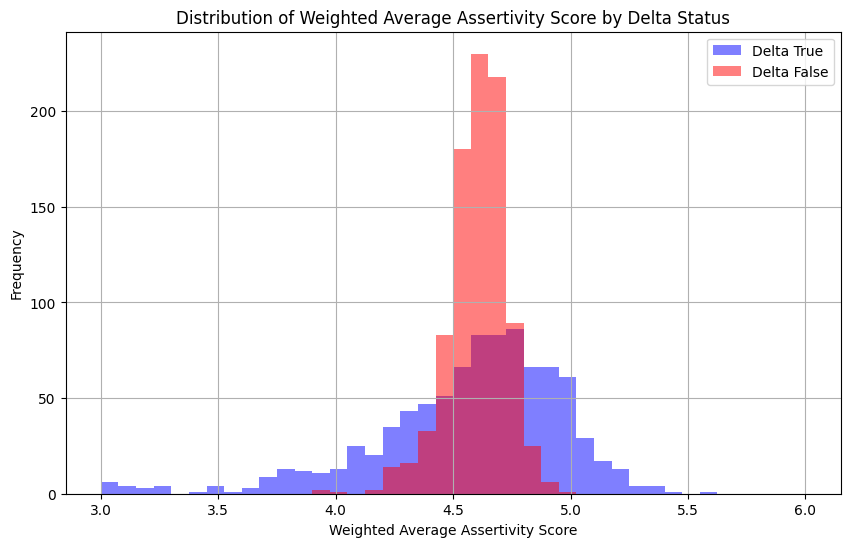

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it has columns 'post_id', 'delta' and 'assertivity'

# Group the data by the post
grouped = df.groupby('post_id')

# Initialize lists to store weighted average assertivity scores
weighted_avg_true = []
weighted_avg_false = []

for name, group in grouped:
    # Calculate weights
    weight_true = 1 / len(group[group['delta']])
    weight_false = 1 / len(group[~group['delta']])
    
    # Calculate weighted average assertivity score for comments with delta True
    weighted_avg_true.append((group[group['delta']]['assertivity'] * weight_true).sum())
    
    # Calculate weighted average assertivity score for comments with delta False
    weighted_avg_false.append((group[~group['delta']]['assertivity'] * weight_false).sum())

# Define the number of bins and the range for the histogram
num_bins = 40
score_range = (3, 6)  # Adjust this range according to your data

# Calculate bin edges
bin_edges = np.linspace(score_range[0], score_range[1], num_bins + 1)

# Plot the histograms with weights
plt.figure(figsize=(10, 6))

# Histogram for delta True
plt.hist(weighted_avg_true, bins=bin_edges, alpha=0.5, color='blue', label='Delta True')

# Histogram for delta False
plt.hist(weighted_avg_false, bins=bin_edges, alpha=0.5, color='red', label='Delta False')

plt.xlabel('Weighted Average Assertivity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Weighted Average Assertivity Score by Delta Status')
plt.legend()
plt.grid(True)
plt.show()

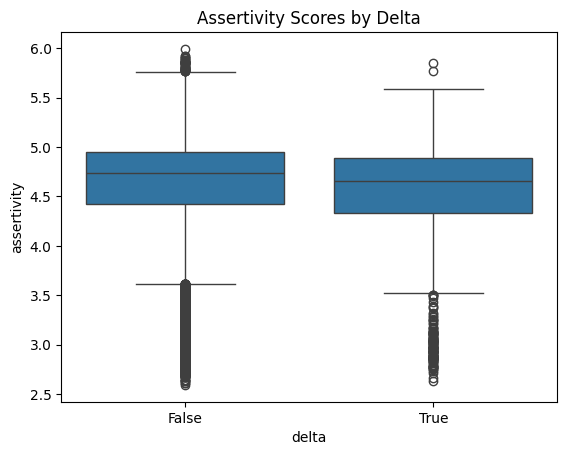

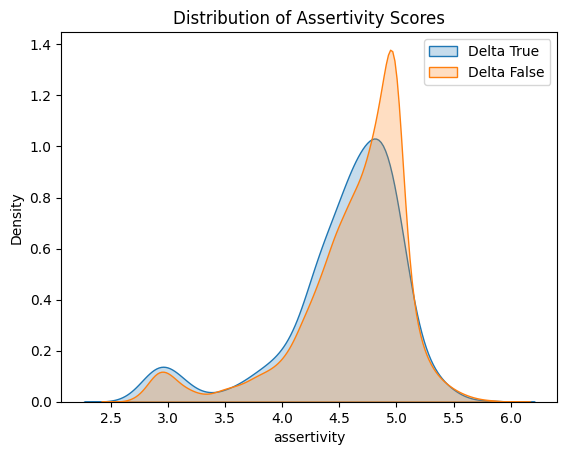

In [15]:
# box plot
from textwrap import fill
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
# Box Plot
sns.boxplot(x='delta', y='assertivity', data=df)
plt.title('Assertivity Scores by Delta')
plt.show()

# Histogram/KDE Plot
sns.kdeplot(df[df['delta'] == True]['assertivity'], label='Delta True', fill=True)
sns.kdeplot(df[df['delta'] == False]['assertivity'], label='Delta False', fill=True)
plt.title('Distribution of Assertivity Scores')
plt.legend()
plt.show()


In [18]:
# group the data by the post
grouped = df.groupby('post_id')
# for each post, subsample delta false comments with length equal to the number of comments with delta true
subsampled = []
for name, group in grouped:
    delta_true = group[group['delta']]
    delta_false = group[~group['delta']]
    
    # Subsample delta false comments
    if len(delta_true) > len(delta_false):
        delta_false_subsampled = delta_false.sample(n=len(delta_false), random_state=42)
    else:
        delta_false_subsampled = delta_false.sample(n=len(delta_true), random_state=42)
    
    # Combine delta true and subsampled delta false comments
    combined = pd.concat([delta_true, delta_false_subsampled])
    subsampled.append(combined)

# Concatenate the subsampled dataframes
subsampled_df = pd.concat(subsampled)
subsampled_df.head(20)

,post_id,OP_text,delta,comment_text,assertivity,full_text,num_tokens,relevance
78600,1003si2,"As the title indicates, I (USA) feel political...",True,So I guess I'm struggling with the issue here....,4.756406,"PROMPT: \nWhen analyzing comments, determine t...",644,1.0
78601,1003si2,"As the title indicates, I (USA) feel political...",True,I mean based on that last paragraph you’re def...,3.822654,"PROMPT: \nWhen analyzing comments, determine t...",793,1.0
78608,1003si2,"As the title indicates, I (USA) feel political...",True,"Agreed, but I think you’ll find more in common...",4.377519,"PROMPT: \nWhen analyzing comments, determine t...",798,1.0
78634,1003si2,"As the title indicates, I (USA) feel political...",True,"As far as student loans, we don't have great a...",3.786721,"PROMPT: \nWhen analyzing comments, determine t...",1038,1.0
78635,1003si2,"As the title indicates, I (USA) feel political...",True,"In that case, I don't see much reason to ident...",4.772902,"PROMPT: \nWhen analyzing comments, determine t...",672,1.0
78647,1003si2,"As the title indicates, I (USA) feel political...",False,"Every time there is a mass shooting, there's a...",4.192904,"PROMPT: \nWhen analyzing comments, determine t...",620,1.0
78655,1003si2,"As the title indicates, I (USA) feel political...",False,"&gt;Those rights currently are up for debate, ...",4.653138,"PROMPT: \nWhen analyzing comments, determine t...",606,1.0
78588,1003si2,"As the title indicates, I (USA) feel political...",False,No one really feels like they perfectly align ...,3.913643,"PROMPT: \nWhen analyzing comments, determine t...",846,1.0
78638,1003si2,"As the title indicates, I (USA) feel political...",False,&gt; Do I wish there was better stuff in place...,4.955189,"PROMPT: \nWhen analyzing comments, determine t...",667,1.0
78593,1003si2,"As the title indicates, I (USA) feel political...",False,"&gt;but if there were say 6 more, would you fi...",4.532747,"PROMPT: \nWhen analyzing comments, determine t...",647,1.0


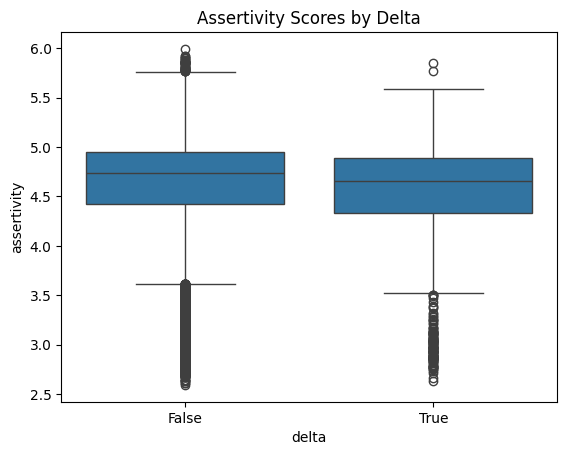

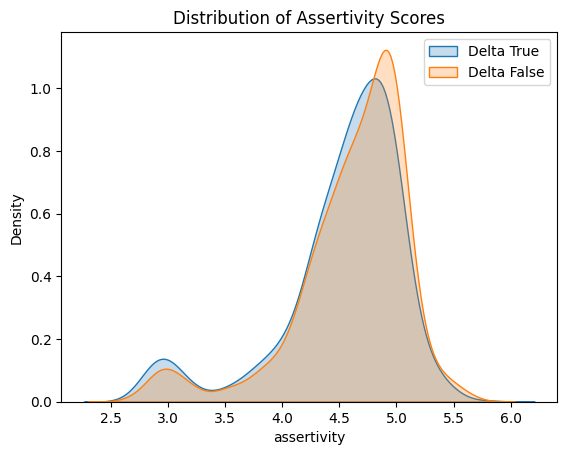

In [19]:
# box plot
from textwrap import fill
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
# Box Plot
sns.boxplot(x='delta', y='assertivity', data=df)
plt.title('Assertivity Scores by Delta')
plt.show()

# Histogram/KDE Plot
sns.kdeplot(subsampled_df[subsampled_df['delta'] == True]['assertivity'], label='Delta True', fill=True)
sns.kdeplot(subsampled_df[subsampled_df['delta'] == False]['assertivity'], label='Delta False', fill=True)
plt.title('Distribution of Assertivity Scores')
plt.legend()
plt.show()


Logistic regression for a numerical analysis of the correlation

Optimization terminated successfully.
         Current function value: 0.164624
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  delta   No. Observations:                46977
Model:                          Logit   Df Residuals:                    46975
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                0.002803
Time:                        11:39:07   Log-Likelihood:                -7733.5
converged:                       True   LL-Null:                       -7755.3
Covariance Type:            nonrobust   LLR p-value:                 4.286e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8974      0.191     -9.916      0.000      -2.272      -1.522
assertivity    -0.2851    

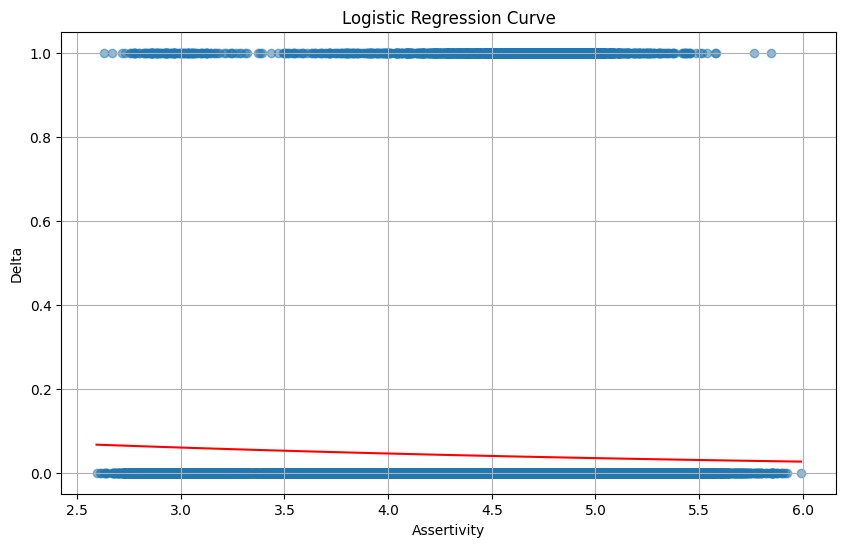

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Logistic regression
X = sm.add_constant(df['assertivity'])
y = df['delta']

logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary
print(result.summary())

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.scatter(df['assertivity'], df['delta'], alpha=0.5)

# Generate the values for the logistic regression line
x_values = np.linspace(df['assertivity'].min(), df['assertivity'].max(), 100)
y_values = result.predict(sm.add_constant(x_values))

# Plot the logistic regression line
plt.plot(x_values, y_values, color='red')

plt.xlabel('Assertivity')
plt.ylabel('Delta')
plt.title('Logistic Regression Curve')
plt.grid(True)
plt.show()